In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt 
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

df=pd.read_csv("attritionDataset.csv")
print(df.head())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [2]:
print(df.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

This dataset has no missing values


<Axes: xlabel='count', ylabel='Attrition'>

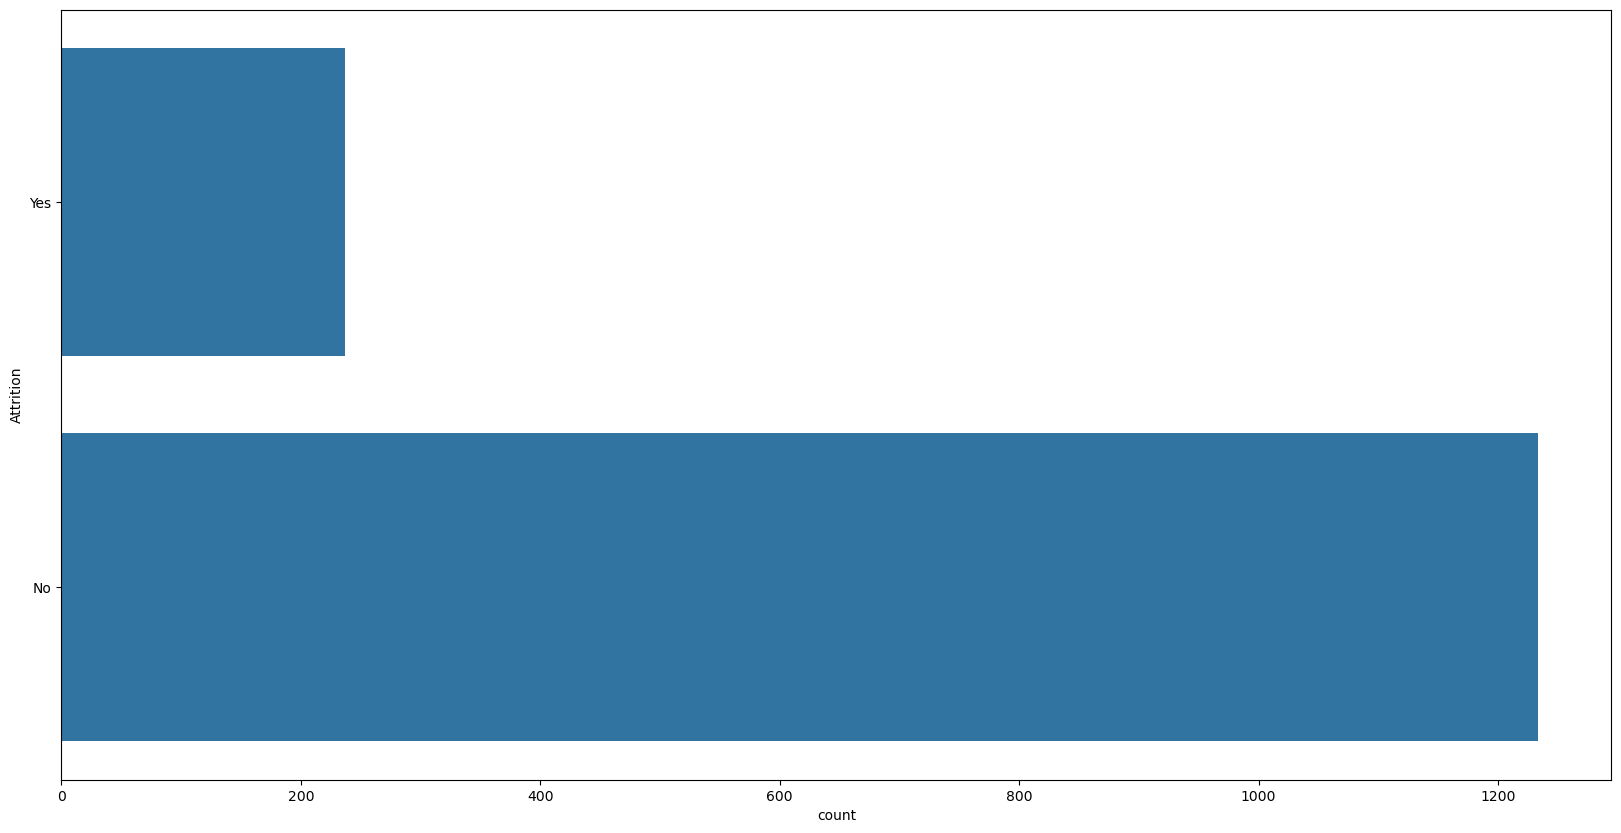

In [3]:
import seaborn as sns
sns.countplot(df['Attrition'])

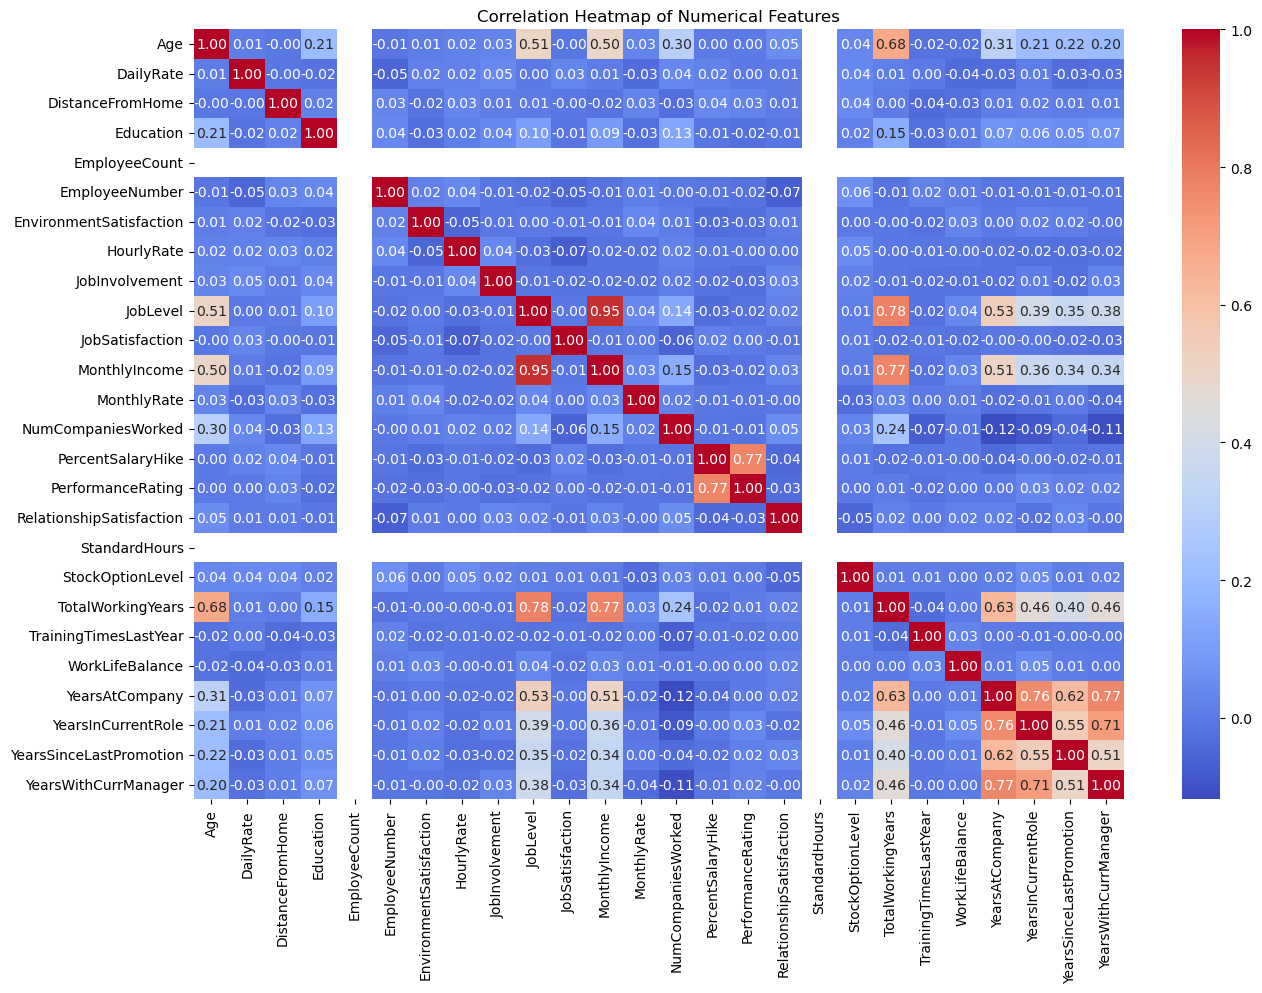

In [4]:

def plot_correlation_matrix(data):
    numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
    correlation_matrix = data[numerical_features].corr()
    
    plt.figure(figsize=(15, 10))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
    plt.title("Correlation Heatmap of Numerical Features")
    plt.show()

plot_correlation_matrix(df)



In [5]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse_output=False)
ohe_array=encoder.fit_transform(df[['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']])
df_cat=pd.DataFrame(ohe_array,columns=encoder.get_feature_names_out(['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']))
df_fin=pd.concat([df,df_cat],axis=1).drop(['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime'],axis=1);
print(df_fin.head())


   Age  DailyRate  DistanceFromHome  Education  EmployeeCount  EmployeeNumber  \
0   41       1102                 1          2              1               1   
1   49        279                 8          1              1               2   
2   37       1373                 2          2              1               4   
3   33       1392                 3          4              1               5   
4   27        591                 2          1              1               7   

   EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  ...  \
0                        2          94               3         2  ...   
1                        3          61               2         2  ...   
2                        4          92               2         1  ...   
3                        4          56               3         1  ...   
4                        1          40               3         1  ...   

   JobRole_Research Director  JobRole_Research Scientist  \
0             

In [6]:
print(df_fin.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 57 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   int64  
 1   DailyRate                          1470 non-null   int64  
 2   DistanceFromHome                   1470 non-null   int64  
 3   Education                          1470 non-null   int64  
 4   EmployeeCount                      1470 non-null   int64  
 5   EmployeeNumber                     1470 non-null   int64  
 6   EnvironmentSatisfaction            1470 non-null   int64  
 7   HourlyRate                         1470 non-null   int64  
 8   JobInvolvement                     1470 non-null   int64  
 9   JobLevel                           1470 non-null   int64  
 10  JobSatisfaction                    1470 non-null   int64  
 11  MonthlyIncome                      1470 non-null   int64

In [7]:
df_fin.drop(['EmployeeCount','EmployeeNumber','Over18_Y','StandardHours'],axis=1)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,49,279,8,1,3,61,2,2,2,5130,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,37,1373,2,2,4,92,2,1,3,2090,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,33,1392,3,4,4,56,3,1,3,2909,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,27,591,2,1,1,40,3,1,2,3468,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1466,39,613,6,1,4,42,2,3,1,9991,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1467,27,155,4,3,2,87,4,2,2,6142,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1468,49,1023,2,3,4,63,2,2,2,5390,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [8]:
X=df_fin.drop(['Attrition_No','Attrition_Yes'],axis=1)
y=df_fin[['Attrition_Yes']]
print(X.head())

   Age  DailyRate  DistanceFromHome  Education  EmployeeCount  EmployeeNumber  \
0   41       1102                 1          2              1               1   
1   49        279                 8          1              1               2   
2   37       1373                 2          2              1               4   
3   33       1392                 3          4              1               5   
4   27        591                 2          1              1               7   

   EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  ...  \
0                        2          94               3         2  ...   
1                        3          61               2         2  ...   
2                        4          92               2         1  ...   
3                        4          56               3         1  ...   
4                        1          40               3         1  ...   

   JobRole_Research Director  JobRole_Research Scientist  \
0             

In [9]:
print(y.head())

   Attrition_Yes
0            1.0
1            0.0
2            1.0
3            0.0
4            0.0


C:\Users\Nikhil Vaidyanath\AppData\Local\Temp\ipykernel_9400\2029694845.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, palette='coolwarm')


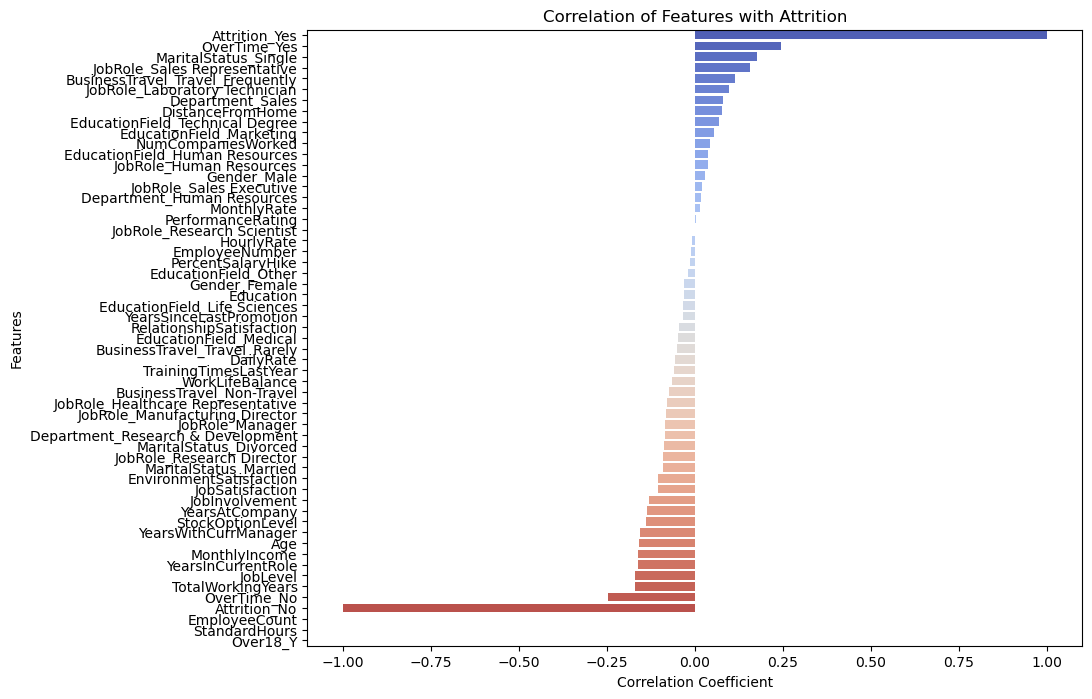

In [10]:
correlation_with_target = df_fin.corr(numeric_only=True)['Attrition_Yes'].sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, palette='coolwarm')
plt.title('Correlation of Features with Attrition')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test= train_test_split(X,y, test_size=0.25, random_state=0)

In [12]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=15, random_state=42)
forest.fit(x_train, y_train)

c:\Users\Nikhil Vaidyanath\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_estimators=15, random_state=42)

In [13]:
forest.score(x_train,y_train)

0.9945553539019963

In [14]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test, forest.predict(x_test))

TN=cm[0][0]
TP=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]

print(cm)
print("Testing Accuracy= {}".format((TP+TN)/(TP+TN+FP+FN)))


[[307   3]
 [ 48  10]]
Testing Accuracy= 0.8614130434782609


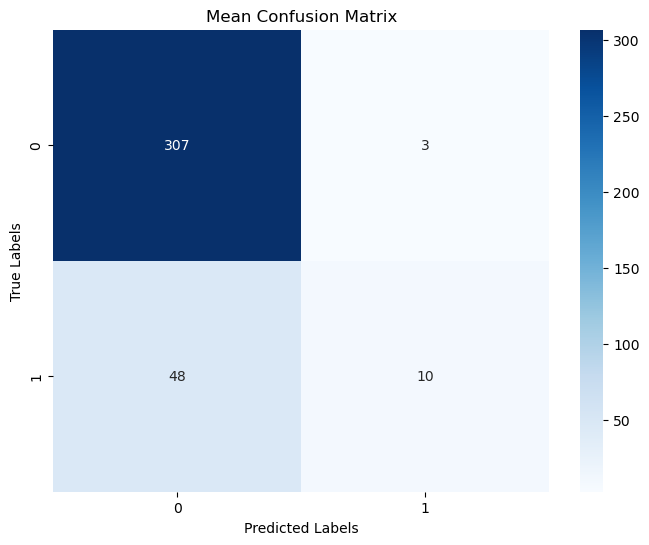

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Mean Confusion Matrix')
plt.show()


In [16]:
importance=forest.feature_importances_
feature_names=X.columns
fi_df=pd.DataFrame({'Feature':feature_names, 'Importance':importance})

fi_df=fi_df.sort_values(by="Importance", ascending=False)
print(fi_df)

                              Feature  Importance
11                      MonthlyIncome    0.065066
0                                 Age    0.060277
12                        MonthlyRate    0.050619
7                          HourlyRate    0.047263
2                    DistanceFromHome    0.047215
19                  TotalWorkingYears    0.046360
1                           DailyRate    0.041846
5                      EmployeeNumber    0.037973
22                     YearsAtCompany    0.037472
13                 NumCompaniesWorked    0.033330
25               YearsWithCurrManager    0.032944
54                       OverTime_Yes    0.030231
14                  PercentSalaryHike    0.027510
23                 YearsInCurrentRole    0.026323
8                      JobInvolvement    0.024785
10                    JobSatisfaction    0.024763
21                    WorkLifeBalance    0.024703
9                            JobLevel    0.023571
53                        OverTime_No    0.023554


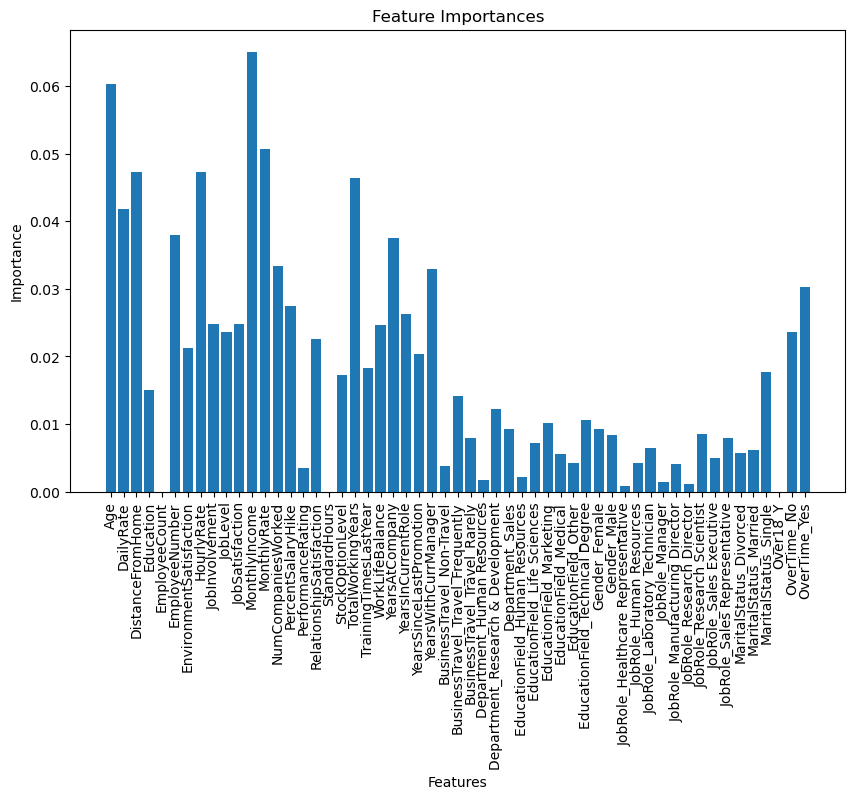

In [17]:
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importance)
plt.xticks(range(X.shape[1]), feature_names, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

Text(0.5, 1.0, 'Age Count of Employees ')

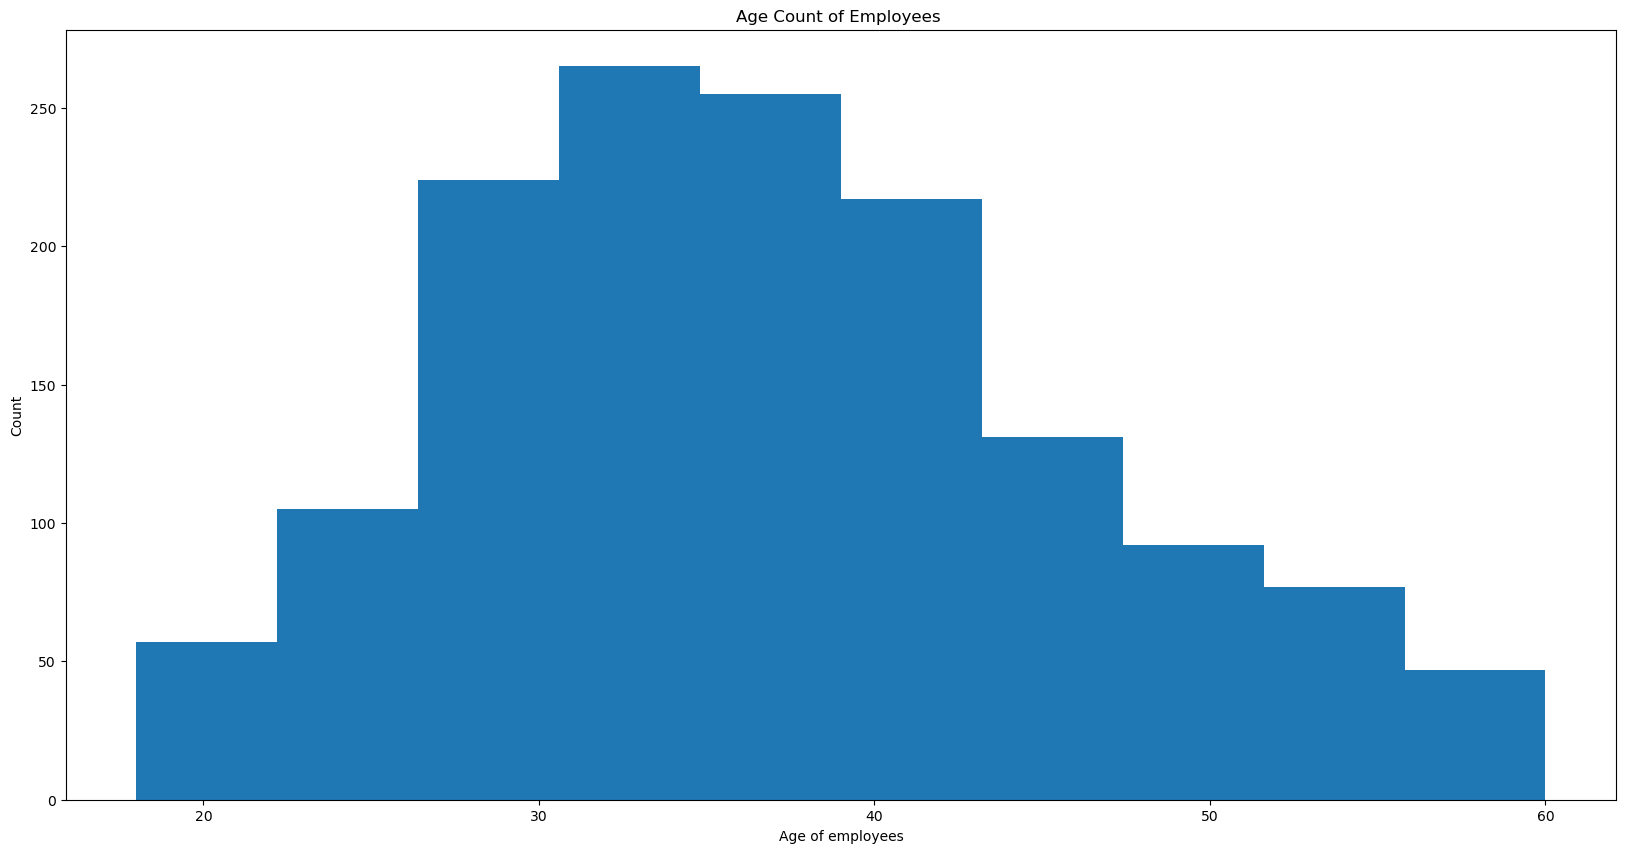

In [18]:
plt.hist(df["Age"])
plt.xlabel("Age of employees")
plt.ylabel("Count")
plt.title("Age Count of Employees ")

In [19]:
def iqr(x):
    return (x.quantile(0.25),x.quantile(0.75))
iqr(df.Age)


(30.0, 43.0)

C:\Users\Nikhil Vaidyanath\AppData\Local\Temp\ipykernel_9400\1362505612.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Attrition",y="Age",data=df,palette = "YlGnBu")


<Axes: xlabel='Attrition', ylabel='Age'>

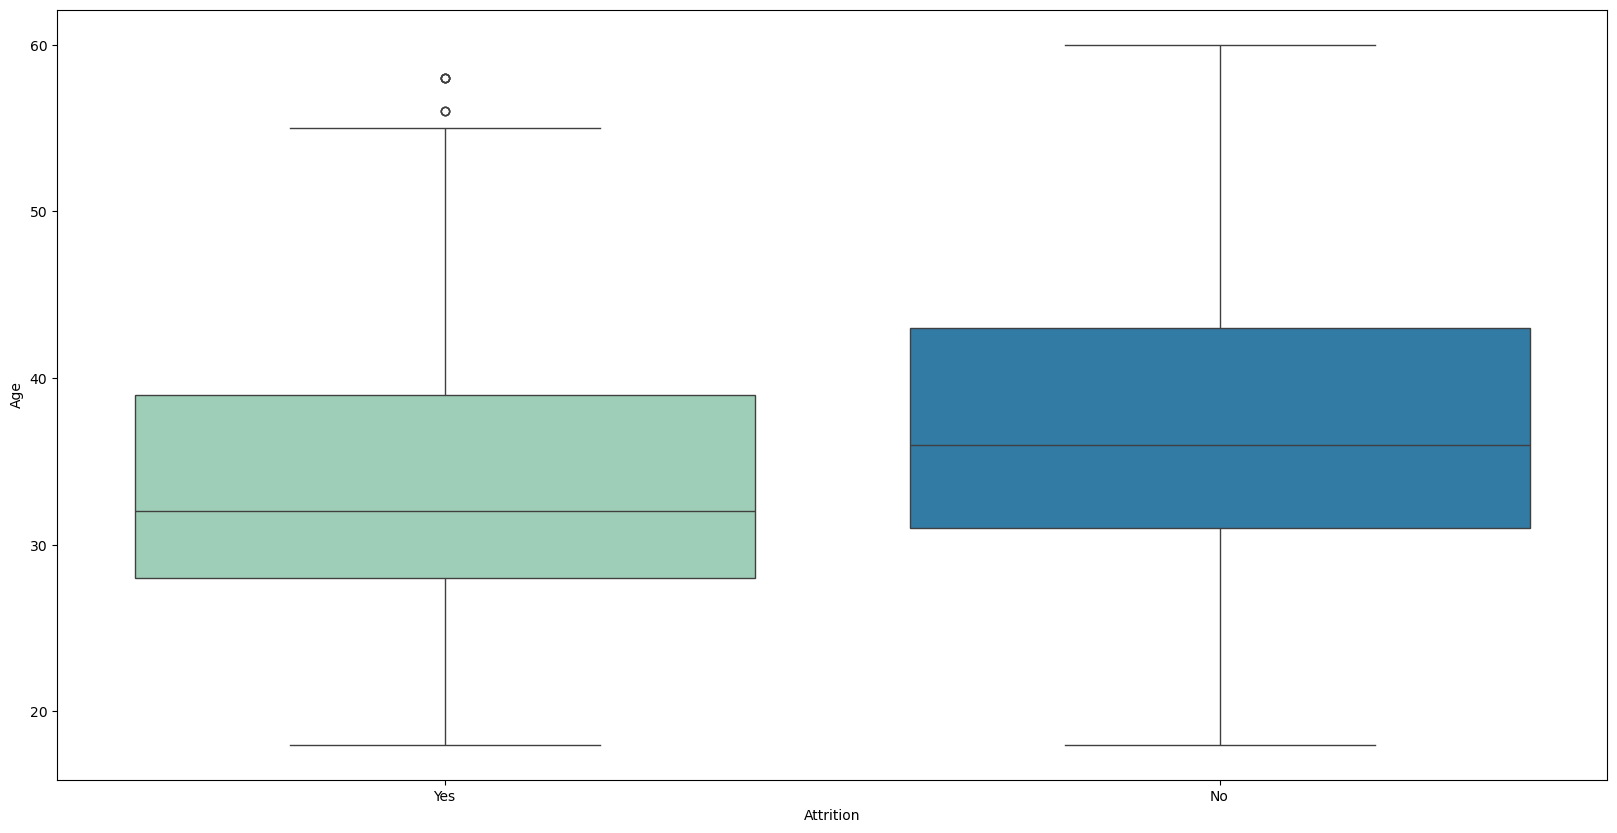

In [20]:
sns.boxplot(x="Attrition",y="Age",data=df,palette = "YlGnBu")

On average, a younger age group produces more attrition, approximately aged between 27 and 37.

In [22]:
df.groupby([df["JobSatisfaction"]>2])[["Age"]].agg(["mean","median","count"])

Age             
                      mean median count
JobSatisfaction                        
False            36.950791   36.0   569
True             36.906770   35.0   901

<Figure size 800x400 with 0 Axes>

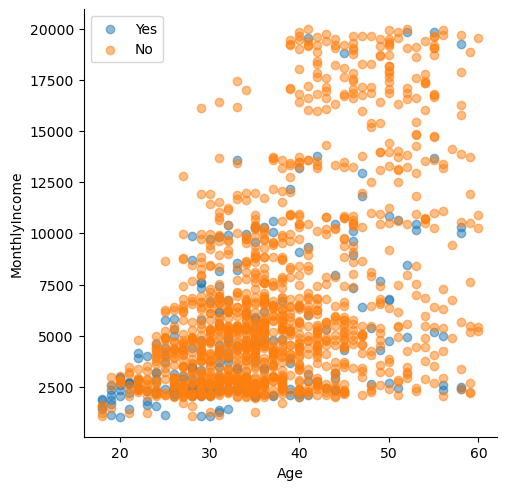

<Figure size 800x400 with 0 Axes>

In [52]:
g = sns.PairGrid(df,x_vars=["Age"],y_vars="MonthlyIncome",hue="Attrition",height=5)
g.map(plt.scatter,alpha=0.5)
plt.legend(loc=(0))
plt.figure(figsize=(8,4))

<Axes: xlabel='Attrition', ylabel='MonthlyIncome'>

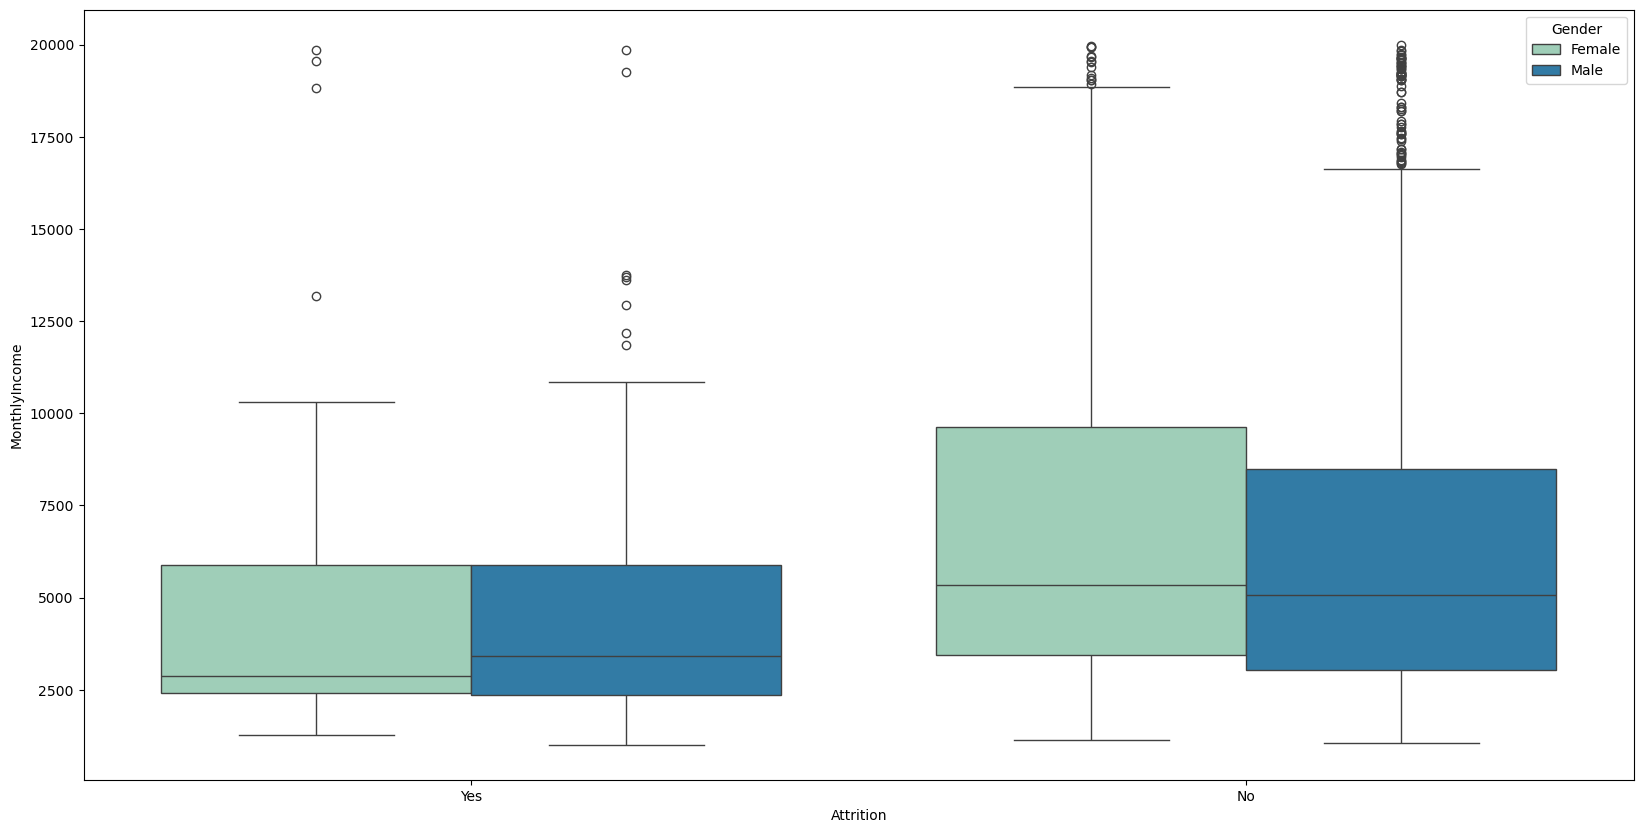

In [24]:
sns.boxplot(x="Attrition",y="MonthlyIncome",hue="Gender",palette = "YlGnBu",data=df)

Text(0.5, 1.0, 'Total working years of employees')

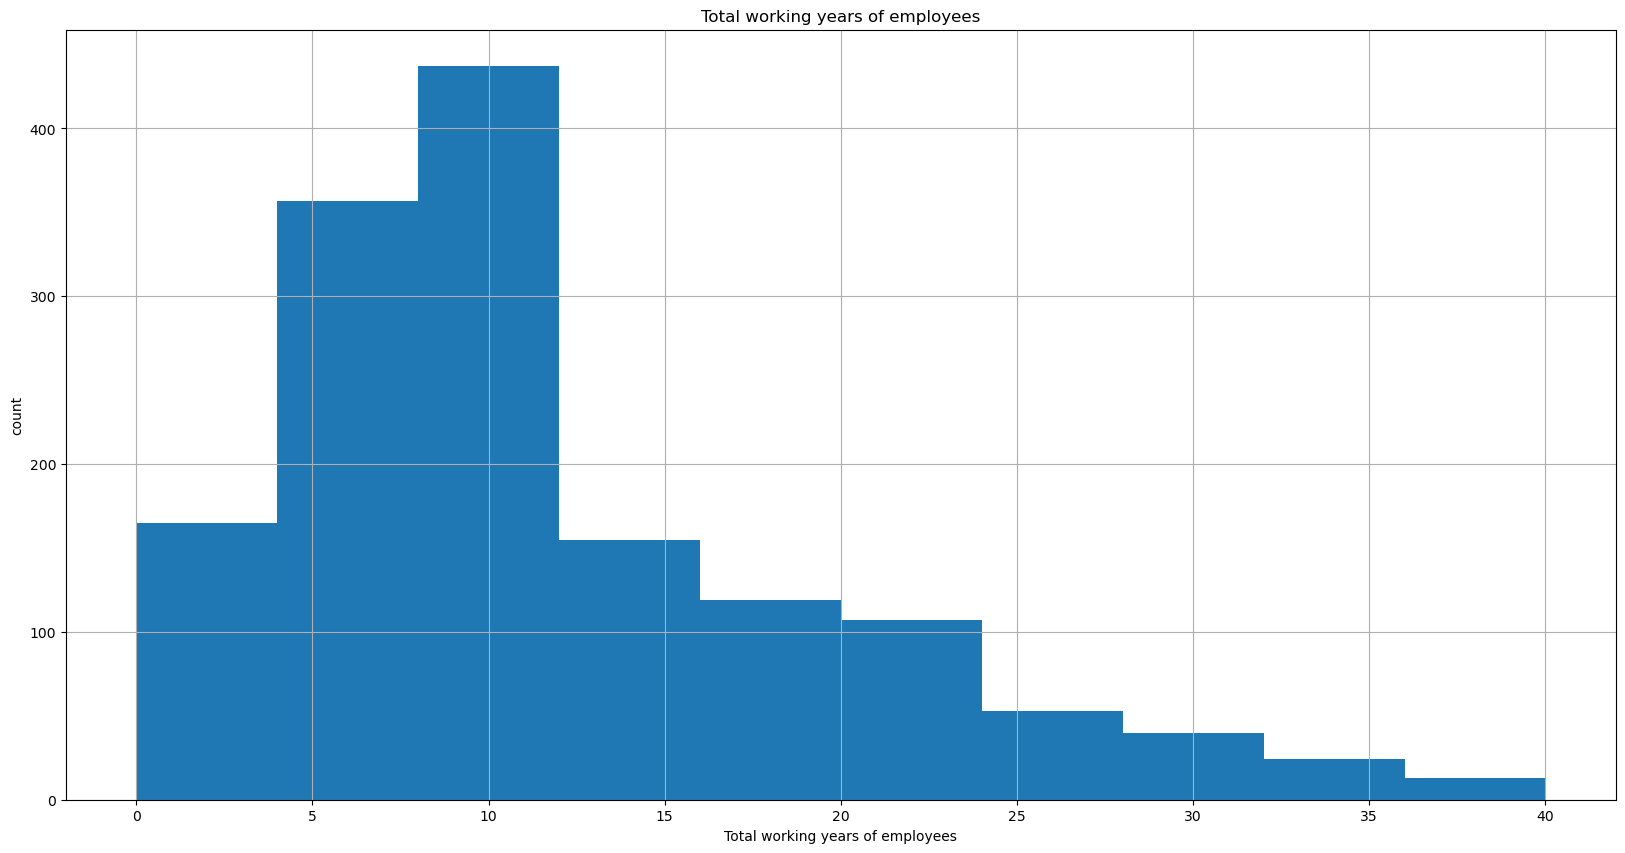

In [25]:
df.TotalWorkingYears.hist()
plt.xlabel("Total working years of employees")
plt.ylabel("count")
plt.title("Total working years of employees")


C:\Users\Nikhil Vaidyanath\AppData\Local\Temp\ipykernel_9400\2339348700.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Attrition",y="TotalWorkingYears",data=df,palette = "YlGnBu")


TotalWorkingYears             
                       mean median count
Attrition                               
No                11.862936   10.0  1233
Yes                8.244726    7.0   237

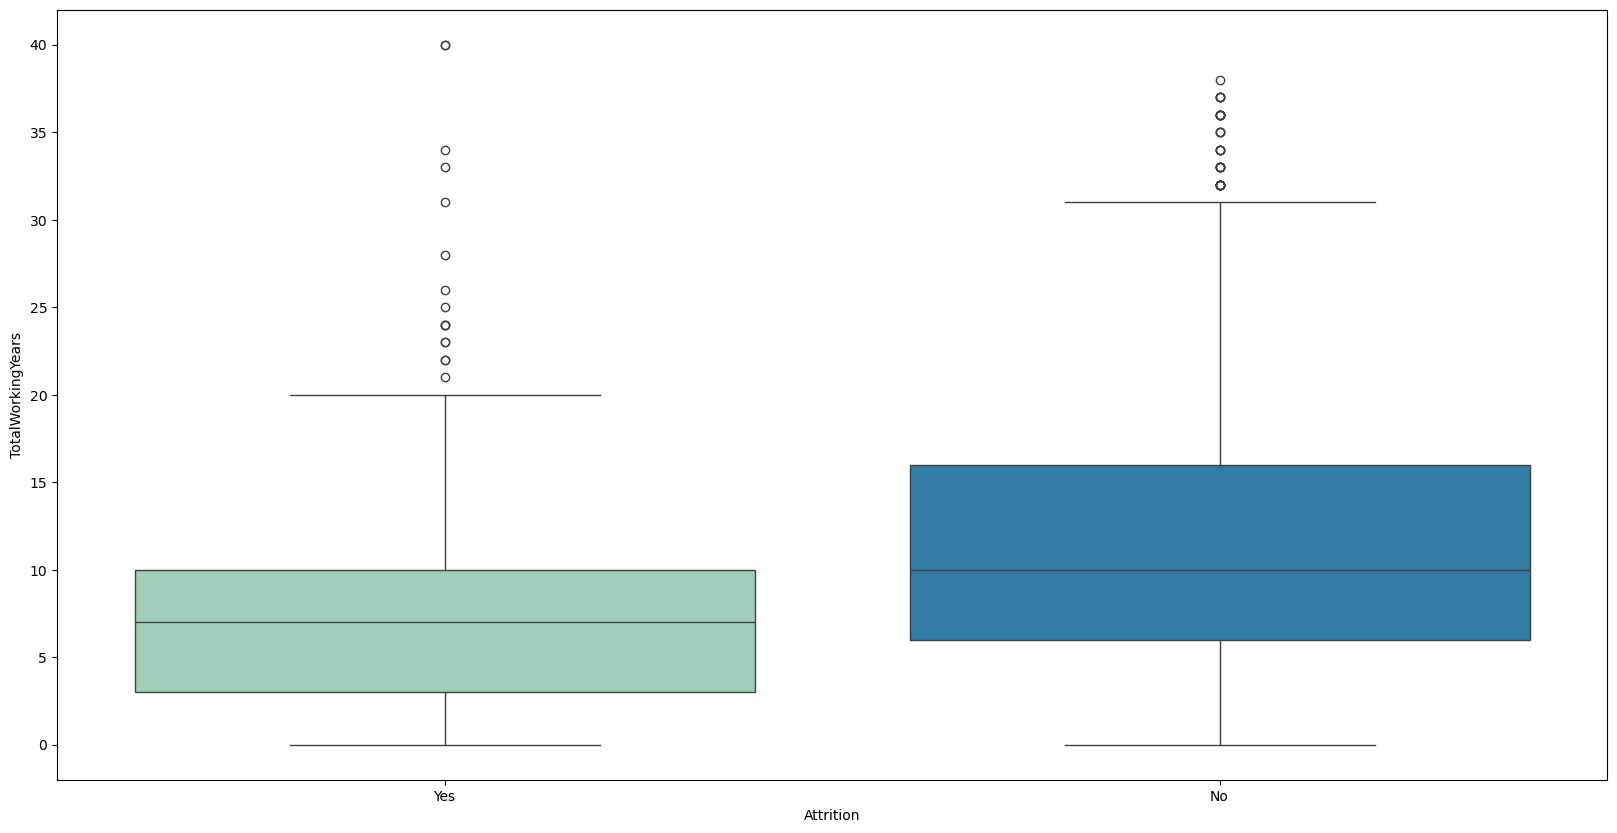

In [26]:
sns.boxplot(x="Attrition",y="TotalWorkingYears",data=df,palette = "YlGnBu")
df.groupby(["Attrition"])[["TotalWorkingYears"]].agg(["mean","median","count"])

In [45]:

df.groupby(["OverTime","Attrition"])[["Attrition"]].agg(["count"])


Attrition
                       count
OverTime Attrition          
No       No              944
         Yes             110
Yes      No              289
         Yes             127

YearsInCurrentRole       
                        mean median
Attrition                          
False               4.229252    3.0

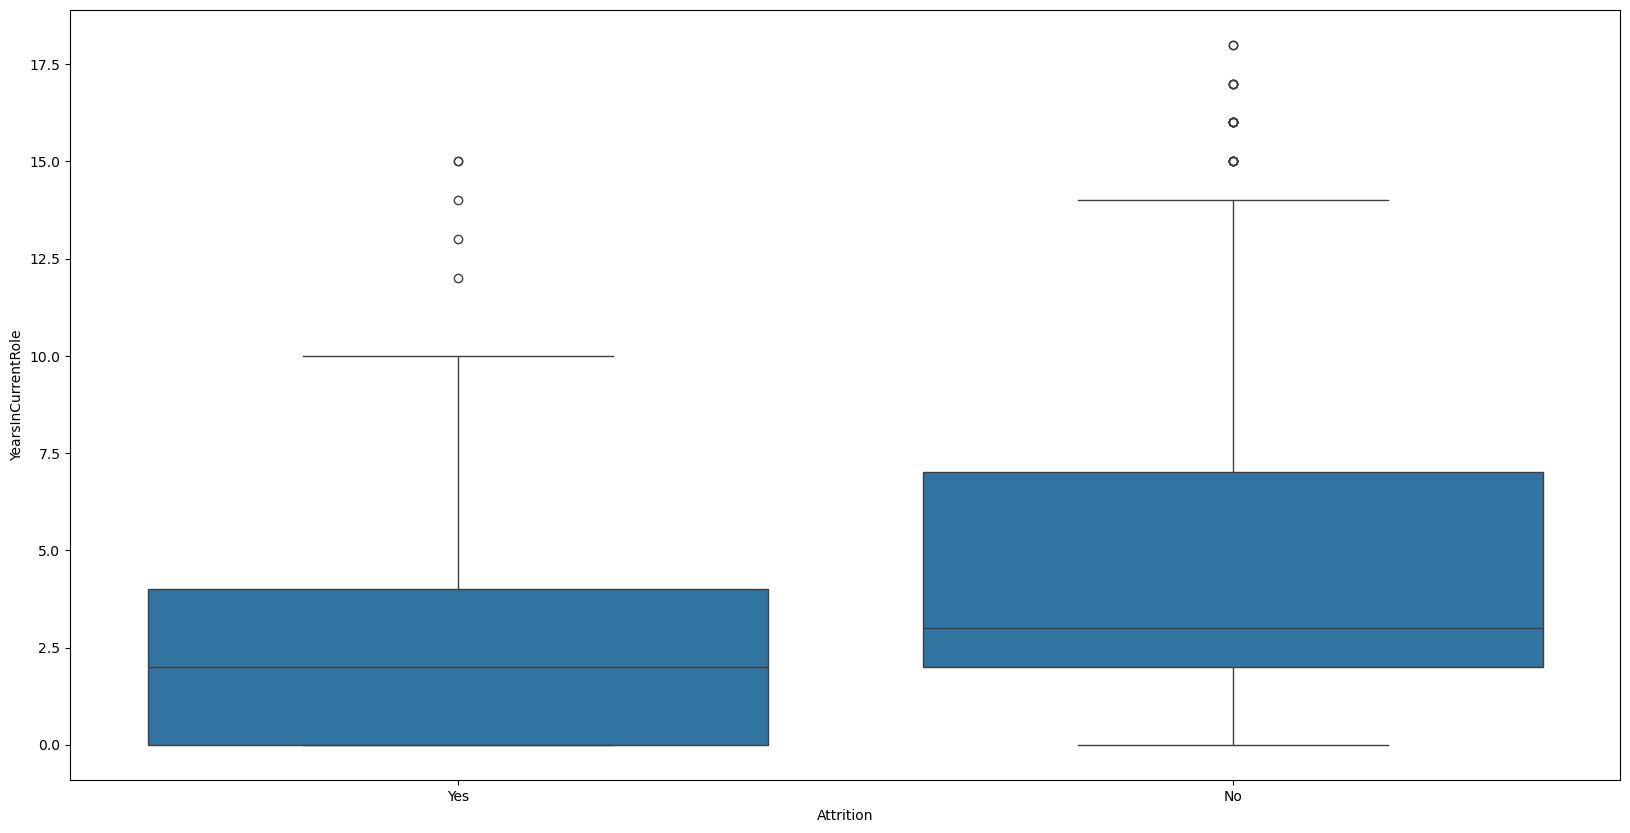

In [30]:
sns.boxplot(x="Attrition",y="YearsInCurrentRole",data=df)
df.groupby(df["Attrition"]==1)[["YearsInCurrentRole"]].agg(["mean","median"])

People who got attrited have stayed in a current role for around 2 years.

Proportion of female to male is 40 : 60


C:\Users\Nikhil Vaidyanath\AppData\Local\Temp\ipykernel_9400\4083456426.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Gender", data = df, palette = "YlGnBu")


<Axes: xlabel='Gender', ylabel='count'>

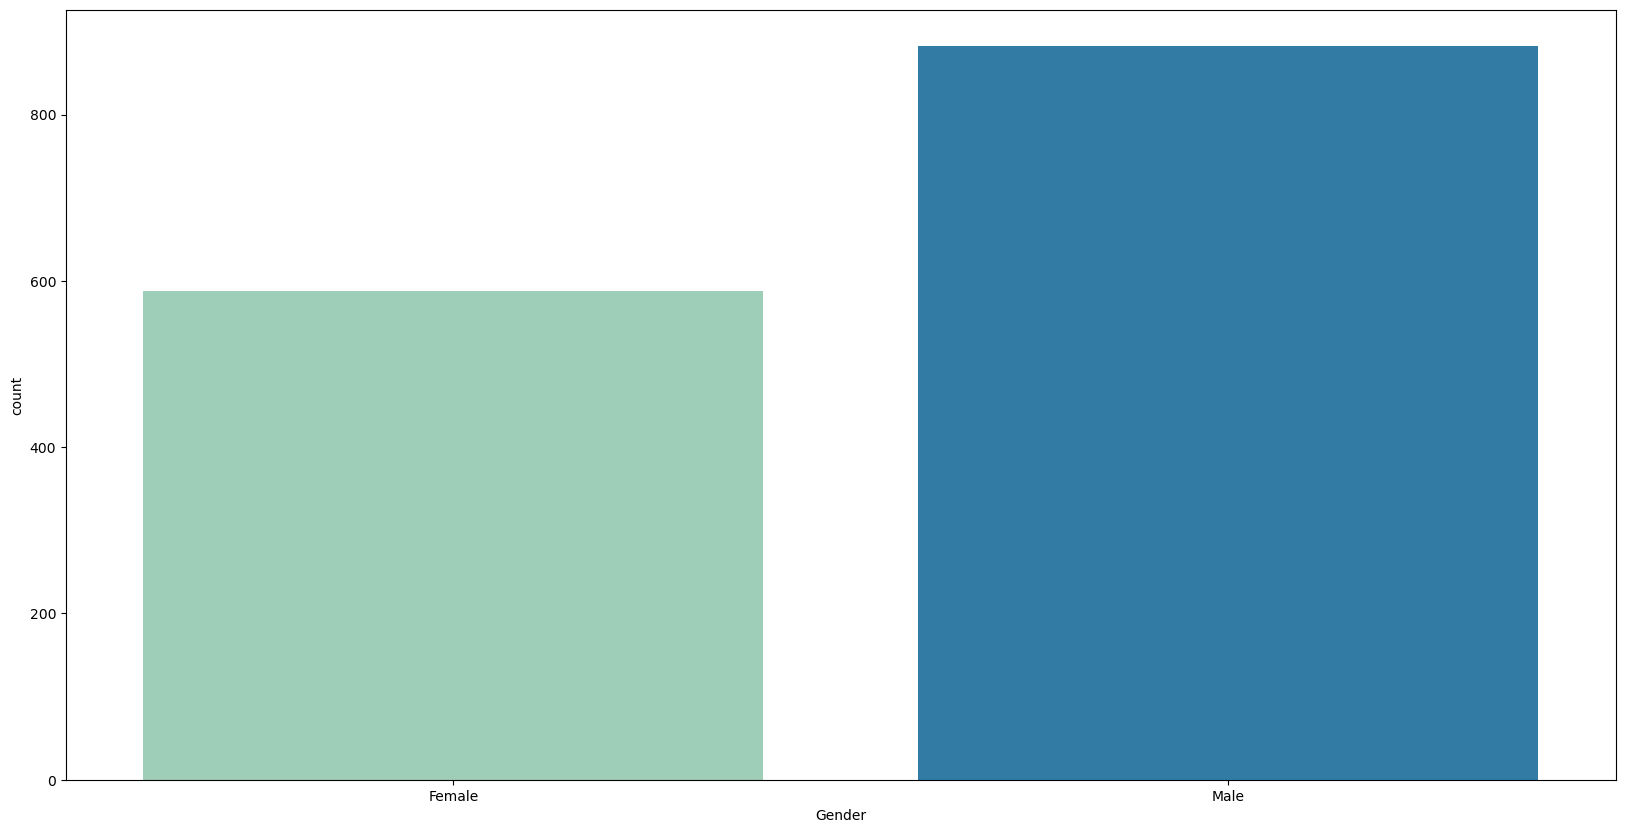

In [31]:
male = int((df.loc[(df.Gender == "Male"), "Gender"].count()/ len(df.Gender))*100)
female = int((df.loc[(df.Gender == "Female"), "Gender"].count()/ len(df.Gender))*100)

print("Proportion of female to male is {} : {}".format(female, male))

sns.countplot(x="Gender", data = df, palette = "YlGnBu")

Average for age of female employees is 37.33 and for male employees is 36.65


C:\Users\Nikhil Vaidyanath\AppData\Local\Temp\ipykernel_9400\3177062026.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Gender", y="Age", data = df, palette = "YlGnBu")


<Axes: xlabel='Gender', ylabel='Age'>

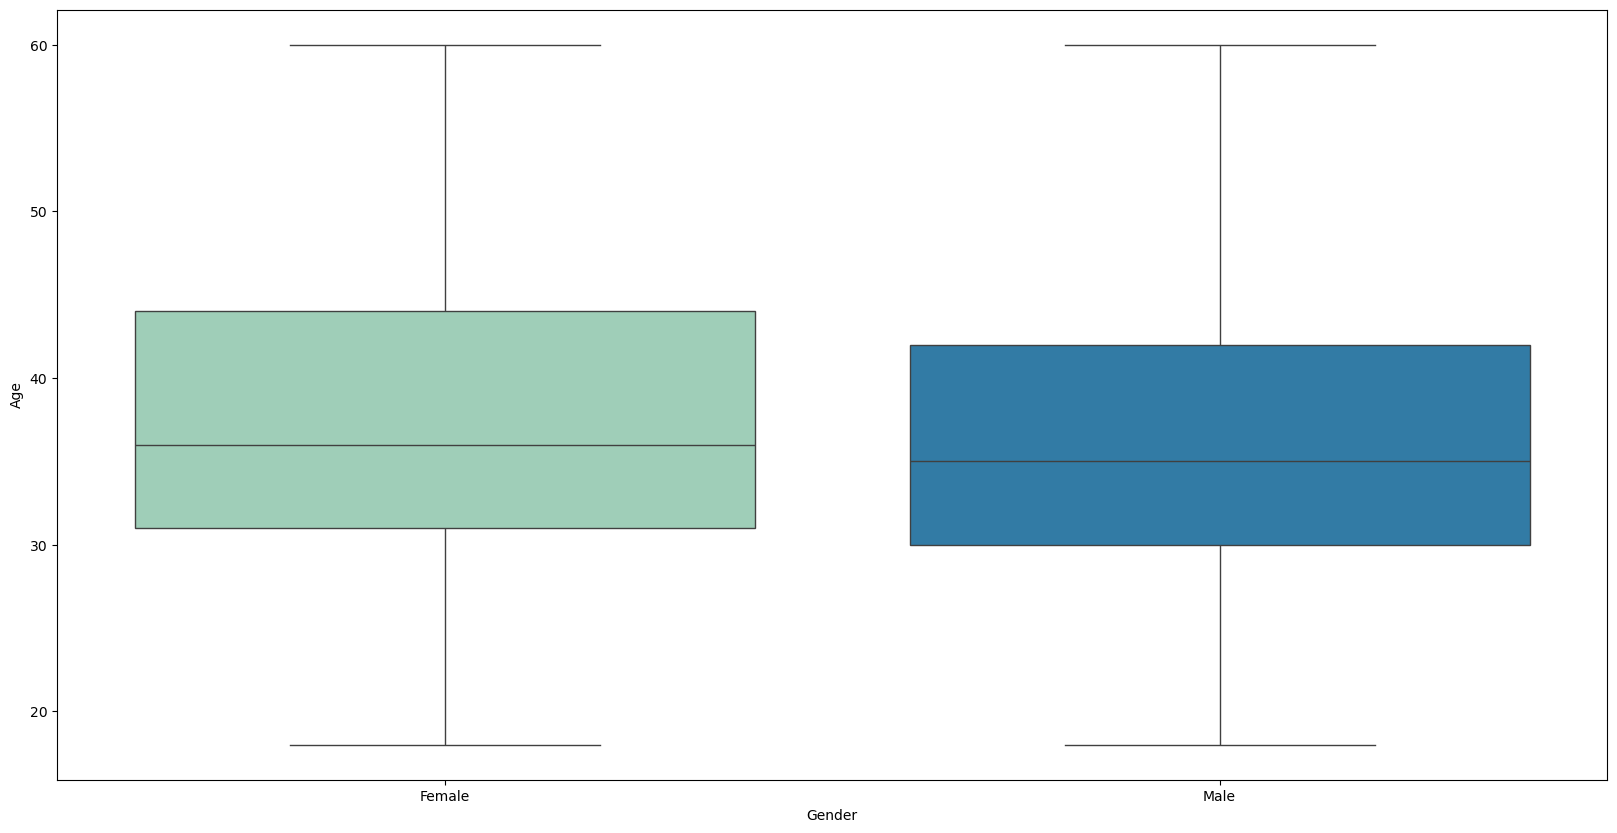

In [32]:
male = round(df[df.Gender == "Male"].Age.mean(),2)
female = round(df[df.Gender == "Female"].Age.mean(),2)

print("Average for age of female employees is {} and for male employees is {}".format(female, male))

sns.boxplot(x="Gender", y="Age", data = df, palette = "YlGnBu")

<Axes: xlabel='Attrition'>

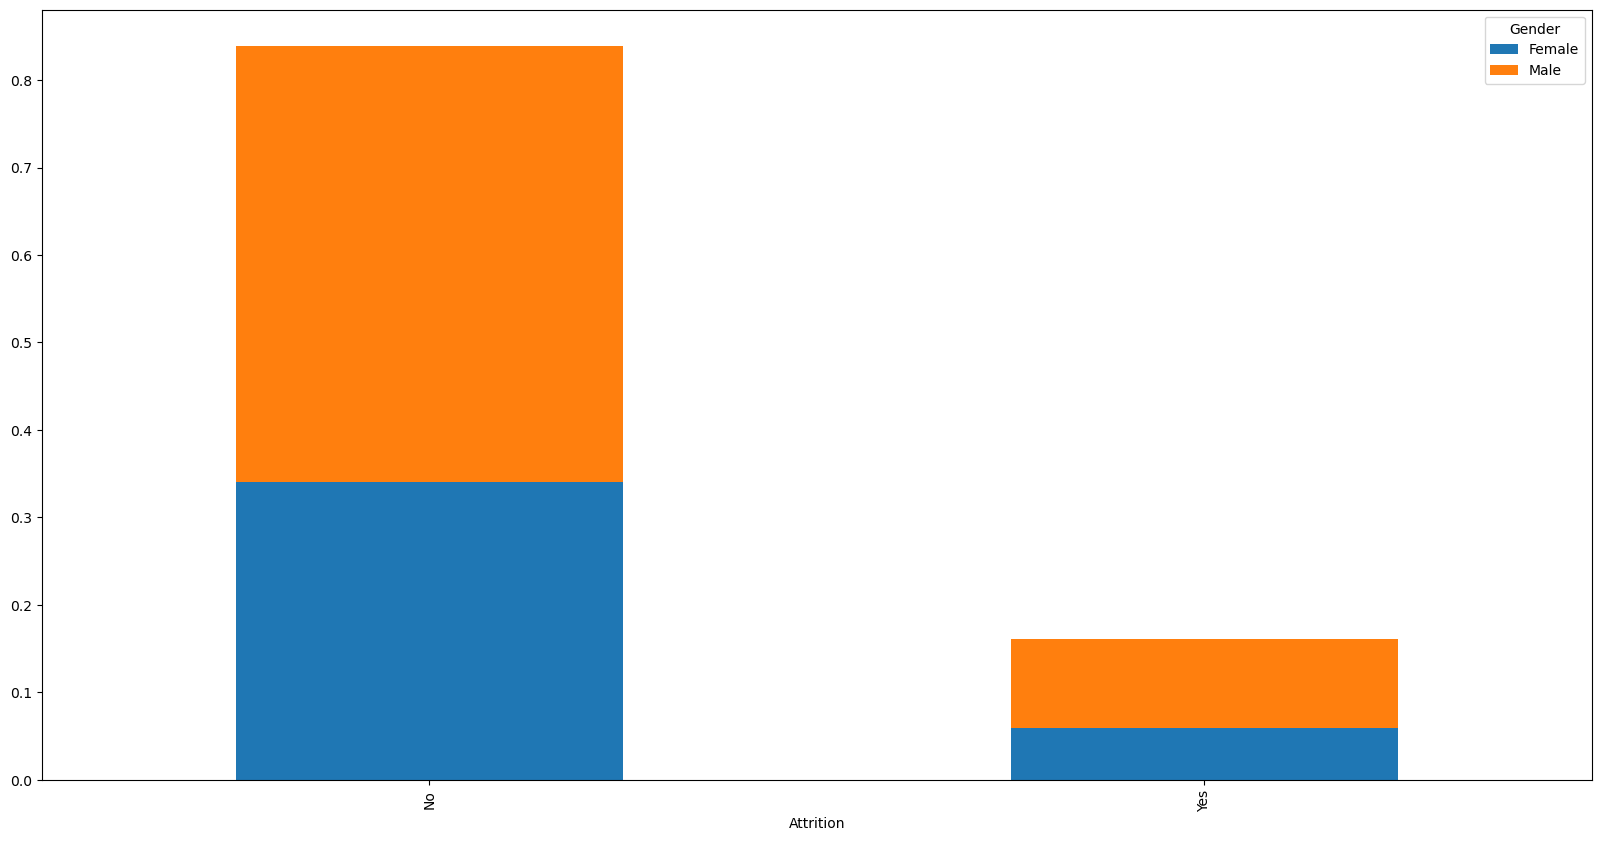

In [33]:
pd.crosstab(df["Attrition"], df["Gender"], normalize=True).plot(kind='bar', stacked=True)

<Axes: xlabel='Attrition'>

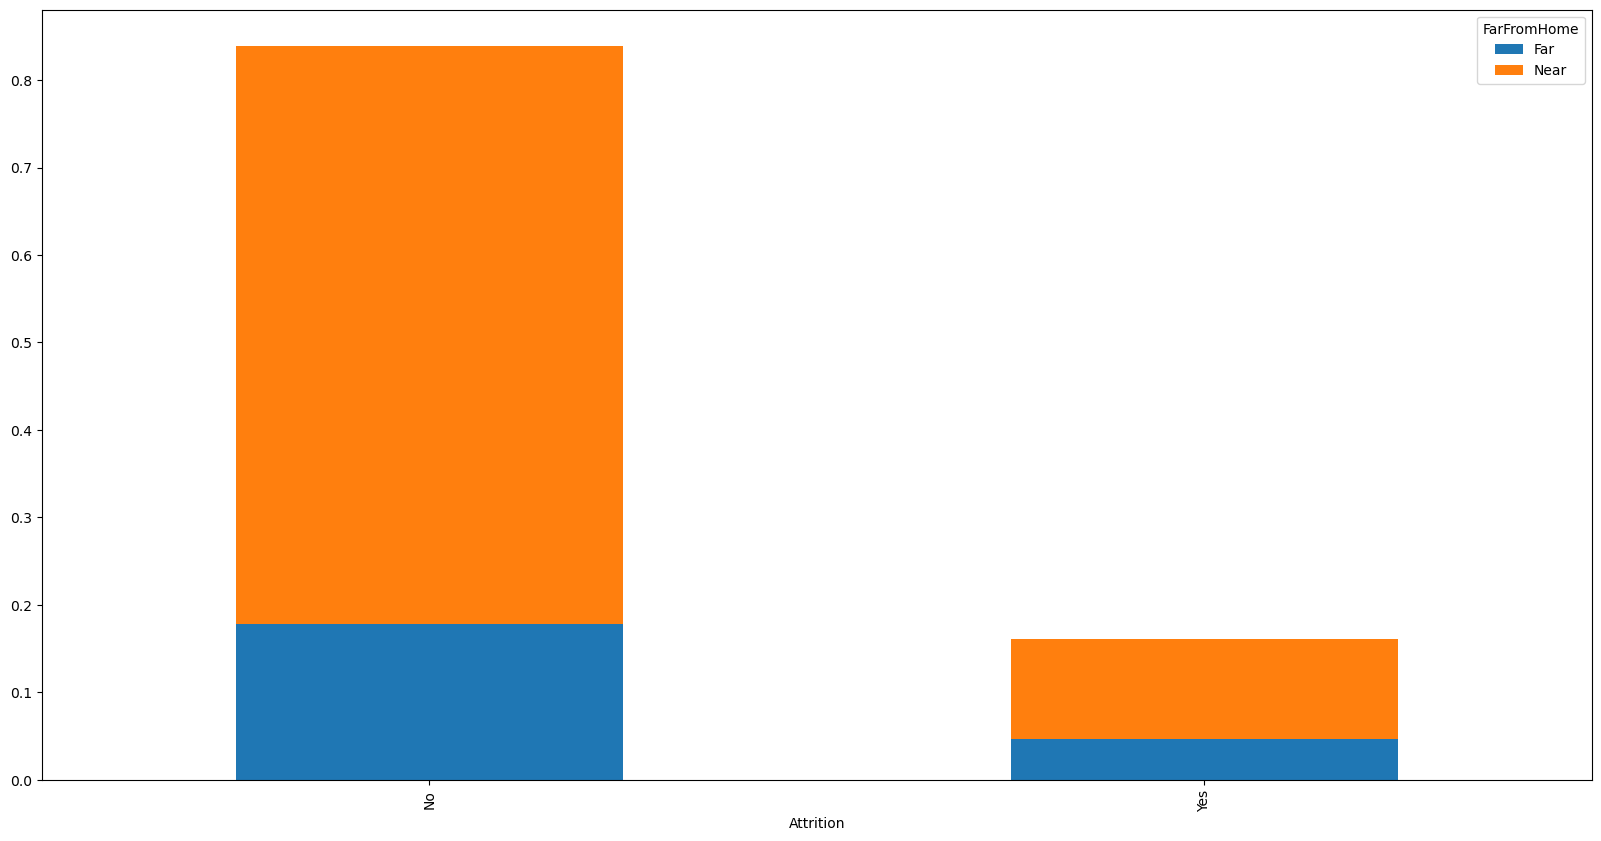

In [34]:
def DFH(DistanceFromHome):
    if DistanceFromHome > 15:
        return("Far")
    else:
        return("Near")
    
df['FarFromHome'] = df.apply(lambda x: DFH(x['DistanceFromHome']),axis=1)


pd.crosstab(df["Attrition"], df["FarFromHome"], normalize=True).plot(kind='bar', stacked=True)

In [36]:
top_features=fi_df['Feature'][:15].values
x_train_selected=x_train[top_features]
x_test_selected=x_test[top_features]

In [37]:
from sklearn.ensemble import RandomForestClassifier
forest_afterSelection=RandomForestClassifier(n_estimators=15,random_state=42)
forest_afterSelection.fit(x_train_selected, y_train)

c:\Users\Nikhil Vaidyanath\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_estimators=15, random_state=42)

In [38]:
forest_afterSelection.score(x_train_selected,y_train)

0.9927404718693285

In [39]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test, forest_afterSelection.predict(x_test_selected))

TN=cm[0][0]
TP=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]

print(cm)
print("Testing Accuracy= {}".format((TP+TN)/(TP+TN+FP+FN)))

[[302   8]
 [ 47  11]]
Testing Accuracy= 0.8505434782608695


In [40]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score


gbc = GradientBoostingClassifier(random_state=42)


gbc.fit(x_train[top_features], y_train)


y_pred_gbc = gbc.predict(x_test[top_features])


print("\nGradient Boosting Classifier:")
print("Classification Report:")
print(classification_report(y_test, y_pred_gbc))
print(f"Accuracy: {accuracy_score(y_test, y_pred_gbc):.2f}")


c:\Users\Nikhil Vaidyanath\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Gradient Boosting Classifier:
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92       310
         1.0       0.57      0.22      0.32        58

    accuracy                           0.85       368
   macro avg       0.72      0.60      0.62       368
weighted avg       0.82      0.85      0.82       368

Accuracy: 0.85


In [41]:
from xgboost import XGBClassifier


xgb_clf = XGBClassifier(
    objective='multi:softmax',  
    num_class=3,               
    random_state=42,
    n_estimators=100
)


xgb_clf.fit(x_train[top_features], y_train)


y_pred_xgb = xgb_clf.predict(x_test[top_features])


print("\nXGBoost Classifier:")
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.2f}")



XGBoost Classifier:
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.96      0.92       310
         1.0       0.58      0.26      0.36        58

    accuracy                           0.85       368
   macro avg       0.73      0.61      0.64       368
weighted avg       0.83      0.85      0.83       368

Accuracy: 0.85


In [42]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
import numpy as np


kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)


models = {
    "XGBoost": XGBClassifier(objective='multi:softmax', num_class=3, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}


results = {}


for model_name, model in models.items():
    print(f"\nTraining and Testing with {model_name} using K-Fold Cross-Validation:")
    accuracies = []
    fold = 1
    
    for train_idx, test_idx in kfold.split(X, y):
      
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        
        
        model.fit(X_train, y_train)
        
      
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        accuracies.append(acc)
        
        print(f"  Fold {fold}: Accuracy = {acc:.2f}")
        fold += 1
    
 
    avg_accuracy = np.mean(accuracies)
    results[model_name] = avg_accuracy
    print(f"\nAverage Accuracy for {model_name}: {avg_accuracy:.2f}")


print("\nCross-Validation Results Summary:")
for model_name, avg_accuracy in results.items():
    print(f"{model_name}: {avg_accuracy:.2f}")



Training and Testing with XGBoost using K-Fold Cross-Validation:
  Fold 1: Accuracy = 0.84
  Fold 2: Accuracy = 0.87
  Fold 3: Accuracy = 0.84
  Fold 4: Accuracy = 0.89
  Fold 5: Accuracy = 0.90
  Fold 6: Accuracy = 0.86
  Fold 7: Accuracy = 0.87
  Fold 8: Accuracy = 0.88
  Fold 9: Accuracy = 0.87
  Fold 10: Accuracy = 0.85

Average Accuracy for XGBoost: 0.87

Training and Testing with Gradient Boosting using K-Fold Cross-Validation:


c:\Users\Nikhil Vaidyanath\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


  Fold 1: Accuracy = 0.84


c:\Users\Nikhil Vaidyanath\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


  Fold 2: Accuracy = 0.86


c:\Users\Nikhil Vaidyanath\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


  Fold 3: Accuracy = 0.86


c:\Users\Nikhil Vaidyanath\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


  Fold 4: Accuracy = 0.89


c:\Users\Nikhil Vaidyanath\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


  Fold 5: Accuracy = 0.89


c:\Users\Nikhil Vaidyanath\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


  Fold 6: Accuracy = 0.86


c:\Users\Nikhil Vaidyanath\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


  Fold 7: Accuracy = 0.88


c:\Users\Nikhil Vaidyanath\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


  Fold 8: Accuracy = 0.88


c:\Users\Nikhil Vaidyanath\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


  Fold 9: Accuracy = 0.87


c:\Users\Nikhil Vaidyanath\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


  Fold 10: Accuracy = 0.85

Average Accuracy for Gradient Boosting: 0.87

Cross-Validation Results Summary:
XGBoost: 0.87
Gradient Boosting: 0.87


In [43]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np


kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)


xgboost_model = XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)


fold = 1
for train_idx, test_idx in kfold.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    xgboost_model.fit(X_train, y_train) 
    fold += 1

def calculate_attrition_cost(employee_data):
    monthly_income = employee_data['MonthlyIncome']
    years_at_company = employee_data['YearsAtCompany']
    total_working_years = employee_data['TotalWorkingYears']
    return monthly_income * (years_at_company + 0.5 * total_working_years)


def identify_succession_planning_candidates(employee_data):
    if employee_data['JobInvolvement'] >= 3 and employee_data['PerformanceRating'] >= 3:
        return "Recommended for fast-tracking into leadership roles."
    return "No immediate succession planning recommendation."



feature_stats = X.describe()


def generate_retention_strategy_statistical(employee_data, feature_stats):
  
    strategies = []

    if employee_data['MonthlyIncome'] < feature_stats.loc['50%', 'MonthlyIncome']:
        strategies.append("Consider offering a salary adjustment or performance-based incentives.")

    
    if 'OverTime_Yes' in employee_data and employee_data['OverTime_Yes'] == 1:
        strategies.append("Reduce overtime hours or implement flexible work schedules.")

    
    if employee_data['WorkLifeBalance'] < feature_stats.loc['25', 'WorkLifeBalance']:
        strategies.append("Introduce wellness programs or flexible work options.")

    
    if employee_data['JobSatisfaction'] < feature_stats.loc['50%', 'JobSatisfaction']:
        strategies.append("Conduct regular meetings to identify dissatisfaction sources and rotate roles to align with their interests.")

 
    if employee_data['YearsWithCurrentManager'] > feature_stats.loc['75%', 'YearsWithCurrentManager']:
        strategies.append("Discuss ppromotion or role-change opportunities or assign growth-driven projects.")

    
    if employee_data['DistanceFromHome'] > feature_stats.loc['75%', 'DistanceFromHome']:
        strategies.append("Offer remote or hybrid work options to minimize commute challenges.")

    return strategies


def predict_attrition_and_suggest(employee_input, model, feature_stats):
    
    employee_df = pd.DataFrame([employee_input])
    prediction = model.predict(employee_df)
    attrition_prob = model.predict_proba(employee_df)[0][1]

    if prediction[0] == 1:
        strategies = generate_retention_strategy_statistical(employee_df.iloc[0], feature_stats)
    else:
        strategies = ["No immediate retention strategies required."]

    attrition_cost = calculate_attrition_cost(employee_df.iloc[0])
    succession_plan = identify_succession_planning_candidates(employee_df.iloc[0])

    return {
        "AttritionPrediction": "Yes" if prediction[0] == 1 else "No",
        "AttritionProbability": attrition_prob,
        "RetentionStrategies": strategies,
        "EstimatedAttritionCost": attrition_cost,
        "SuccessionPlanning": succession_plan,
    }

example_input = {
    
    "Age": 30,
    "DailyRate": 800,
    "DistanceFromHome": 5,
    "Education": 3,
    "EmployeeCount": 1,
    "EmployeeNumber": 123,
    "EnvironmentSatisfaction": 4,
    "HourlyRate": 70,
    "JobInvolvement": 3,
    "JobLevel": 2,
    "JobSatisfaction": 3,
    "MonthlyIncome": 5000,
    "MonthlyRate": 18000,
    "NumCompaniesWorked": 2,
    "PercentSalaryHike": 12,
    "PerformanceRating": 3,
    "RelationshipSatisfaction": 4,
    "StandardHours": 80,
    "StockOptionLevel": 1,
    "TotalWorkingYears": 10,
    "TrainingTimesLastYear": 3,
    "WorkLifeBalance": 3,
    "YearsAtCompany": 5,
    "YearsInCurrentRole": 3,
    "YearsSinceLastPromotion": 2,
    "YearsWithCurrManager": 3,
    
    
    "BusinessTravel_Non-Travel": 0,
    "BusinessTravel_Travel_Frequently": 1,
    "BusinessTravel_Travel_Rarely": 0,
    "Department_Human Resources": 0,
    "Department_Research & Development": 1,
    "Department_Sales": 0,
    "EducationField_Human Resources": 0,
    "EducationField_Life Sciences": 1,
    "EducationField_Marketing": 0,
    "EducationField_Medical": 0,
    "EducationField_Other": 0,
    "EducationField_Technical Degree": 0,
    "Gender_Female": 0,
    "Gender_Male": 1,
    "JobRole_Healthcare Representative": 0,
    "JobRole_Human Resources": 0,
    "JobRole_Laboratory Technician": 0,
    "JobRole_Manager": 0,
    "JobRole_Manufacturing Director": 0,
    "JobRole_Research Director": 0,
    "JobRole_Research Scientist": 1,
    "JobRole_Sales Executive": 0,
    "JobRole_Sales Representative": 0,
    "MaritalStatus_Divorced": 0,
    "MaritalStatus_Married": 1,
    "MaritalStatus_Single": 0,
    "Over18_Y": 1,
    "OverTime_No": 1,
    "OverTime_Yes": 0,
}



feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": xgboost_model.feature_importances_
})


result = predict_attrition_and_suggest(example_input, xgboost_model, feature_importance_df)

print(result)


{'AttritionPrediction': 'No', 'AttritionProbability': 0.00038574295, 'RetentionStrategies': ['No immediate retention strategies required.'], 'EstimatedAttritionCost': 50000.0, 'SuccessionPlanning': 'Recommended for fast-tracking into leadership roles.'}


In [44]:
xgboost_model.save_model('xgboost_model.json')
